### NAME   : THARUN KAARTHIK G K
### COURSE : 22AIE313 - COMPUTER VISION AND IMAGE PROCESSING
### LABS   : 1, 2, 3
### DATE   : 02/12/2024 , 09/12/2024 , 16/12/2024

###  LAB - 1

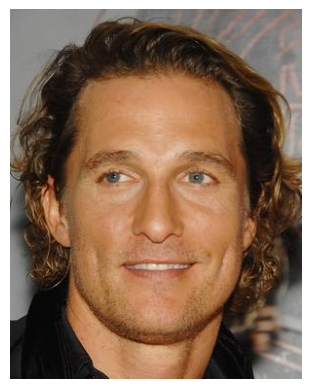

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('22062 CV\SkinColor\FacePhoto\Matthew_narrowweb__300x381,0.jpg') 

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  
plt.show()


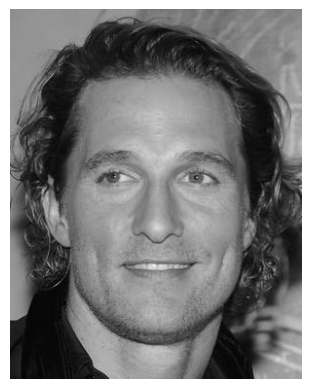

In [3]:
# Converting the original image into a grayscale image
# Grayscale conversion reduces an image from three color channels (Red, Green, Blue) to one (Intensity), effectively removing color information.

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

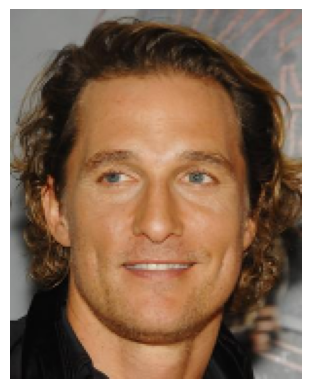

In [4]:
# Resizing the image
# Resizing an image involves changing its width and height. The aspect ratio (the proportional relationship between the width and height) can be maintained or altered.

height, width = image.shape[:2]
new_dim = (int(width * 0.5), int(height * 0.5))
resized_image = cv2.resize(image, new_dim)

resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(resized_image_rgb)
plt.axis('off')
plt.show()

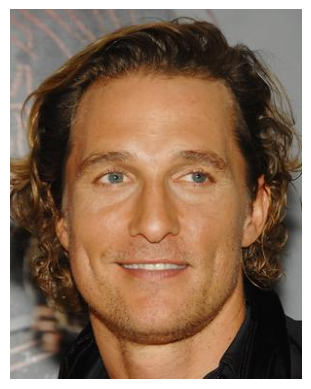

In [5]:
# Flipping the image
# Flipping an image involves reversing the pixels either horizontally (left-right) or vertically (top-bottom).

flipped_image = cv2.flip(image, 1)

flipped_image_rgb = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB)
plt.imshow(flipped_image_rgb)
plt.axis('off')
plt.show()

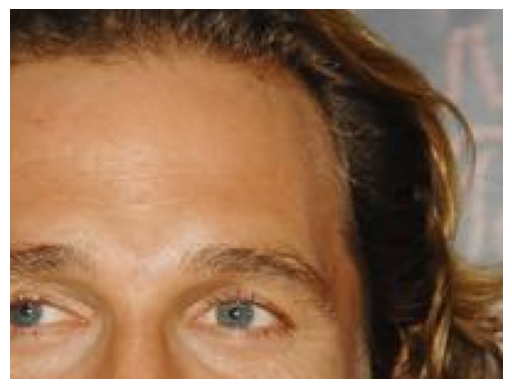

In [6]:
# Cropped image
# Cropping extracts a portion of an image by specifying a rectangular region (usually defined by pixel coordinates).

cropped_image = image[50:200, 100:300]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image_rgb)
plt.axis('off')
plt.show()

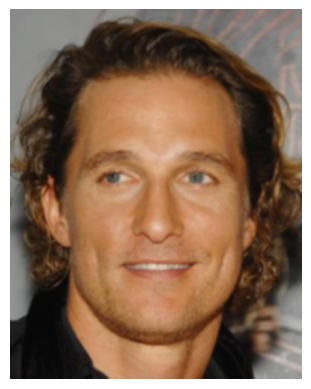

In [7]:
# Blurred image
# Blurring smooths an image by averaging the pixels in the neighborhood of each pixel. 
# Gaussian blur uses a Gaussian function to weight the average, giving more importance to pixels closer to the center.

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_image_rgb)
plt.axis('off')
plt.show()

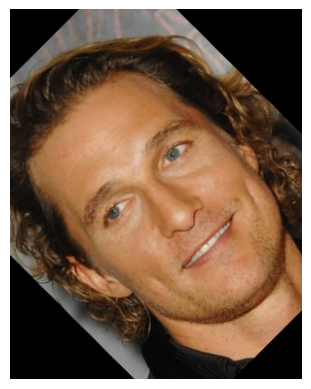

In [8]:
# Rotated image
# Rotation involves turning the image by a specific angle, around a given center point (typically the center of the image).

rows, cols = image.shape[:2]

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) 

rotated_image = cv2.warpAffine(image, M, (cols, rows))

rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.show()

### LAB - 2    

In [11]:
a = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
b = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")
b = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
c = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
d = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")

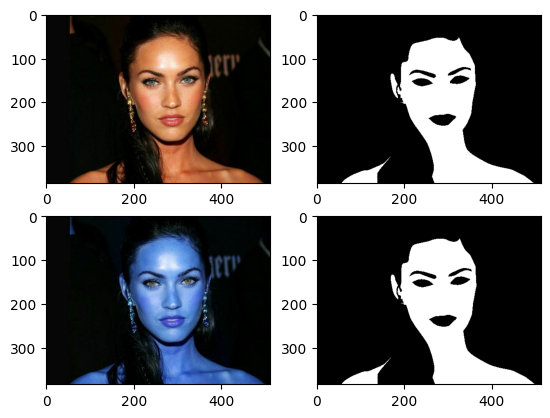

In [12]:
plt.subplot(221)
plt.imshow(a)
plt.subplot(222)
plt.imshow(b)
plt.subplot(223)
plt.imshow(c)
plt.subplot(224)
plt.imshow(d)

In [13]:
skincolors = a[b[:,:,0]==255]
print(skincolors.shape)

(45812, 3)


In [14]:
nonskincolors = a[b[:,:,0]==0]
print(nonskincolors.shape)

(150796, 3)


In [15]:
color = np.vstack((skincolors, nonskincolors))
target = np.concatenate((np.ones(len(skincolors)),np.zeros(len(nonskincolors))))

In [16]:
from sklearn.linear_model import LogisticRegressionCV
learn_color = color[1::2]
test_color = color[0::2]
learn_target = target[1::2]
test_target = target[0::2]
logregr = LogisticRegressionCV()
logregr.fit(learn_color, learn_target)

LogisticRegressionCV()

In [17]:
logregr.score(test_color, test_target)

0.9658915201822916

<function matplotlib.pyplot.show(close=None, block=None)>

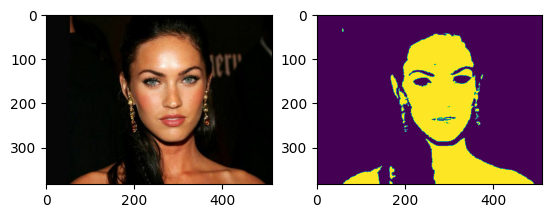

In [18]:
image_colors = a.reshape((-1,3))
predict_skin = logregr.predict(image_colors).reshape(a.shape[:2])
plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(predict_skin)
plt.show

### LAB - 3

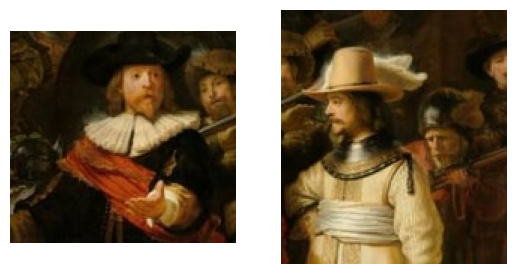

In [19]:
# Image stitching is the process of combining multiple images into a single, panoramic image, 
# and it is commonly used in applications like creating wide-angle photographs or generating 3D models. 
# SIFT (Scale-Invariant Feature Transform) is often used for this task because it can detect and match key features 
# across different images, even if they have different scales, rotations, and slight transformations.

a = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090344.jpg") / 255
plt.subplot(121); plt.imshow(a); plt.axis('off')
b = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090348.jpg") / 255
plt.subplot(122); plt.imshow(b); plt.axis('off')
plt.show()

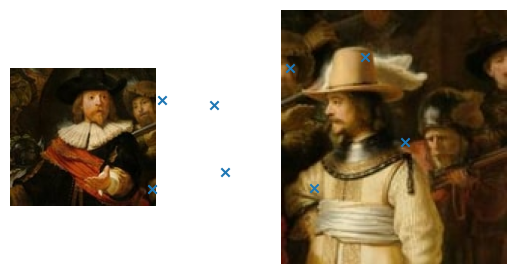

In [20]:
xy = np.array([[ 157, 32],
               [ 211, 37],
               [ 222,107],
               [ 147,124]])

xaya = np.array([[  6, 38],
                 [ 56, 31],
                 [ 82, 87],
                 [ 22,118]])

plt.subplot(121); plt.imshow(a); plt.axis('off')
plt.scatter(xy[:,0], xy[:,1], marker='x')
plt.subplot(122); plt.imshow(b); plt.axis('off')
plt.scatter(xaya[:,0], xaya[:,1], marker='x')
plt.show()

In [21]:
from skimage.transform import warp

In [22]:
P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
print(P)

[[ 1.01685498e+00  3.12932553e-01 -1.63082057e+02]
 [-2.17037452e-01  9.92701412e-01  4.39692054e+01]
 [ 4.93917724e-04  5.87218302e-04  1.00000000e+00]]


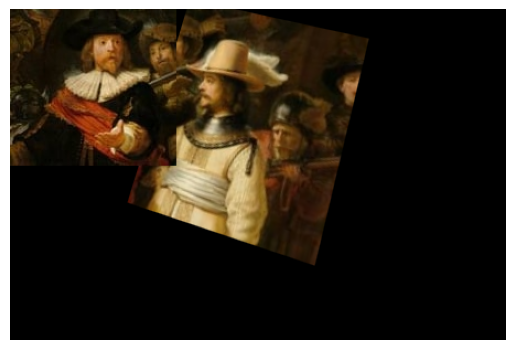

In [23]:
f_stitched = warp(b, P, output_shape=(300,450))
M, N = a.shape[:2]
f_stitched[0:M, 0:N, :] = a
plt.imshow(f_stitched); plt.axis('off')
plt.show()

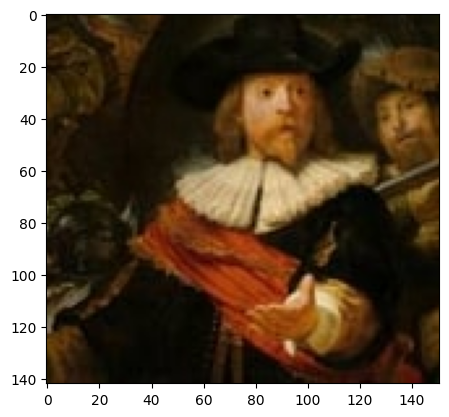

In [24]:
c = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090344.jpg")
fcv2 = c[:,:,::-1]
plt.imshow(c)

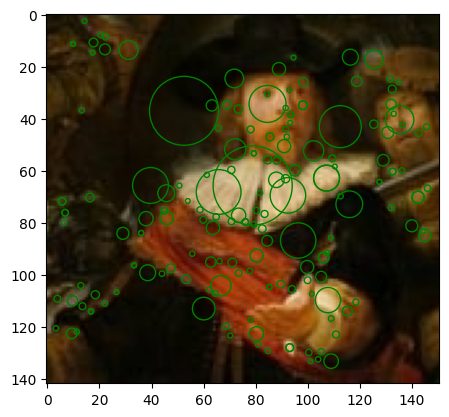

In [25]:
fcv2 = c[:, :, ::-1]
sift = cv2.SIFT_create()
kps, dscs = sift.detectAndCompute(fcv2, mask=None)
fig, ax = plt.subplots()
ax.imshow(c)
for kp in kps:
    ax.add_artist(plt.Circle(kp.pt, kp.size / 2, color='green', fill=False))
plt.show()